In [56]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Load the single marital status dataset
df = pd.read_csv("train_single.csv")

# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))



In [58]:
def fit_ann(X_train, y_train, X_valid, y_valid):
    # Define the parameter grid
    parameters = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    }
    
    # Create the model
    model = MLPClassifier(max_iter=1000, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)  # First subplot
    scores = cv_results['mean_test_score']
    alphas = [param['alpha'] for param in cv_results['params']]
    plt.plot(alphas, scores, marker='o')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Alpha (ANN)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)  # Second subplot
    model = MLPClassifier(max_iter=1000, random_state=42, **grid_search.best_params_)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (ANN)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_



In [59]:
def fit_decision_tree(X_train, y_train, X_valid, y_valid):
    parameters = {'max_depth': [None, 5, 10, 15, 20]}
    
    model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    max_depths = [param['max_depth'] for param in cv_results['params']]
    plt.plot(max_depths, scores, marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Max Depth (Decision Tree)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    model = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
    cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_



Mean Test Score: 0.7630934359205727, Parameters: {'alpha': 0.0001}
Mean Test Score: 0.844966665983083, Parameters: {'alpha': 0.001}
Mean Test Score: 0.8542335413291473, Parameters: {'alpha': 0.01}
Mean Test Score: 0.8489252669238183, Parameters: {'alpha': 0.1}
Mean Test Score: 0.8147487644228348, Parameters: {'alpha': 1}


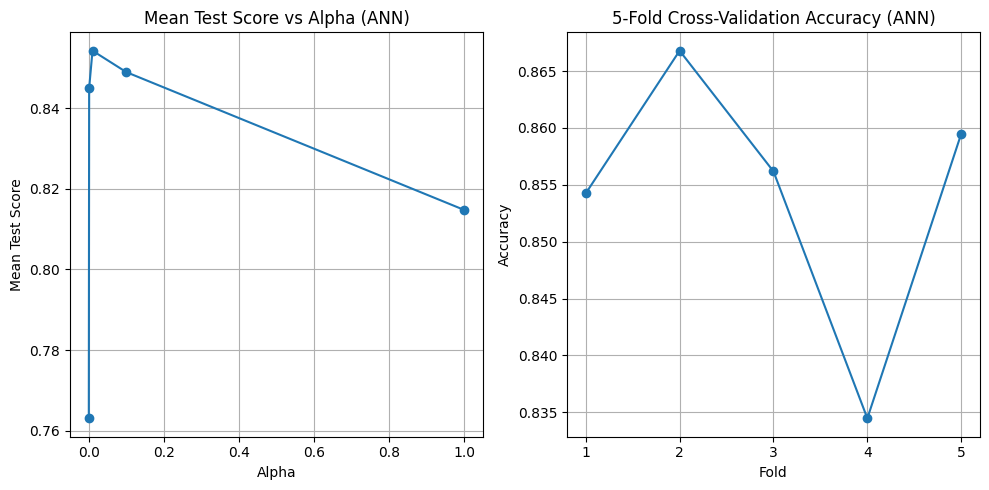

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       976
           1       0.51      0.39      0.44       176

    accuracy                           0.85      1152
   macro avg       0.70      0.66      0.68      1152
weighted avg       0.84      0.85      0.84      1152

Best Score: 0.8542335413291473


In [60]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_ann(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)

Mean Test Score: 0.8459305653173349, Parameters: {'max_depth': None}
Mean Test Score: 0.8702570802160373, Parameters: {'max_depth': 5}
Mean Test Score: 0.8657202608554613, Parameters: {'max_depth': 10}
Mean Test Score: 0.8507573328312101, Parameters: {'max_depth': 15}
Mean Test Score: 0.8462208397263925, Parameters: {'max_depth': 20}


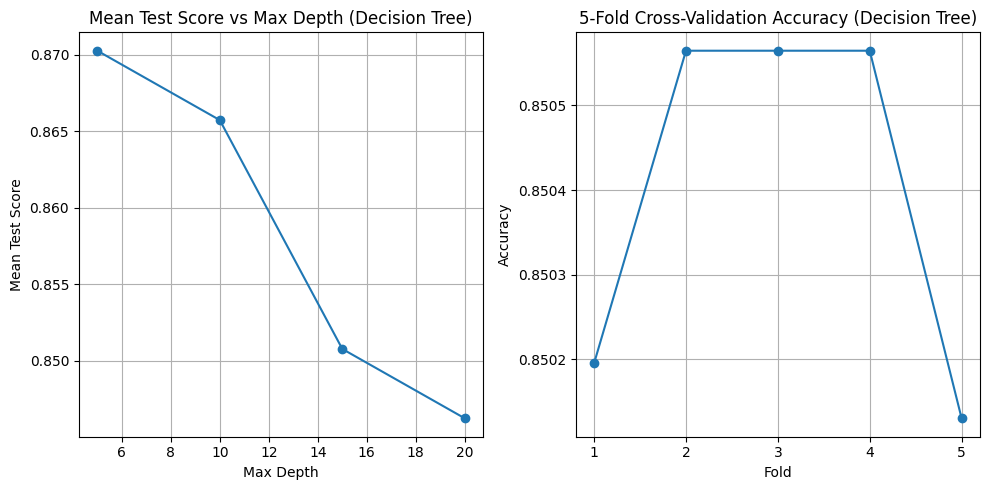

Mean accuracy over 5 folds: 0.8702570802160373
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       976
           1       0.59      0.38      0.46       176

    accuracy                           0.87      1152
   macro avg       0.74      0.66      0.69      1152
weighted avg       0.85      0.87      0.85      1152

Best Score: 0.8702570802160373


In [61]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_decision_tree(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)